# Cause Of Deaths Around The World

##### Trong đồ án này, nhóm chúng em xin phép được trình bày một quy trình Khoa Học Dữ Liệu với dataset về những nguyên nhân gây tử vong vòng quanh thế giới, tiền xử lý dữ liệu, đưa ra các câu hỏi, phân tích và đánh giá.

Link Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world?resource=download

# Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Khám phá dữ liệu

### Đọc dữ liệu từ .csv vào dataframe

Sau khi giải nén bộ dữ liệu đã khám phá ở link trên, chúng ta sẽ được một file "cause_of_deaths.csv"

Chúng ta sẽ tiến hành đọc dữ liệu vào một DataFrame tên là cause_of_deaths_df

In [3]:
cause_of_deaths_df = pd.read_csv("cause_of_deaths.csv")
cause_of_deaths_df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


### Kiểm tra số dòng và số cột của dữ liệu

Kiểm tra số dòng và số cột của dữ liệu, sau đó lưu vào hai biến tên là num_cols và num_rows

In [4]:
def countCols(df):
    result = len(df.axes[1])
    return result

def countRows(df):
    result = len(df.axes[0])
    return result

num_cols = countCols(cause_of_deaths_df)
num_rows = countRows(cause_of_deaths_df)


### Mỗi một cột ( thuộc tính ) có ý nghĩa như thế nào ?

Theo như mô tả của dữ liệu trên kaggle, thì chúng ta có một số dòng dữ liệu cần lưu ý như sau

01. Country/Territory - Tên của nước trên dòng dữ liệu đó

02. Code - Mã của các nước tương ứng

03. Year - Năm diễn ra khi thu thập thông số

Và các cột thứ 4 -> 32 là số người tử vong với nguyên nhân tử vong tương ứng

### Chúng ta sẽ liệt kê các nguyên nhân tử vong này là gì

Liệt kê tất cả các loại nguyên nhân và lưu vào biến names_cause


In [5]:
names_cause = pd.Series(cause_of_deaths_df.columns.values[3:])
names_cause

0                                     Meningitis
1        Alzheimer's Disease and Other Dementias
2                            Parkinson's Disease
3                       Nutritional Deficiencies
4                                        Malaria
5                                       Drowning
6                         Interpersonal Violence
7                             Maternal Disorders
8                                       HIV/AIDS
9                             Drug Use Disorders
10                                  Tuberculosis
11                       Cardiovascular Diseases
12                  Lower Respiratory Infections
13                            Neonatal Disorders
14                         Alcohol Use Disorders
15                                     Self-harm
16                  Exposure to Forces of Nature
17                            Diarrheal Diseases
18          Environmental Heat and Cold Exposure
19                                     Neoplasms
20                  

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu không phù hợp không?

Lấy kiểu dữ liệu của các cột và lưu vào series cols_dtype

In [8]:
cols_name = list(cause_of_deaths_df.columns.values)
cols_dtype = pd.Series(cause_of_deaths_df[cols_name].dtypes)
cols_dtype

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

## Nhận xét kiểu dữ liệu 

Ta có các kiểu từ Year cho tới các kiểu dữ liệu số lượng người tử vong về một nguyên nhân nào đó thuộc kiểu dữ liệu int và là numercial

Chúng ta sẽ cần tìm hiểu cụ thể kiểu dữ liệu của Country/Territory và Code là gì

Ta sẽ viết một hàm để tìm hiểu kỹ hơn kiểu dữ liệu của cột trên, ở đây chúng ta sẽ sử dụng phương thức apply để làm.

In [ ]:
def open_object_dtype(s):
    dtypes = set()
    
    #Ta sẽ append lần lượt các type của từng s[i] vào trong set
    ##Thì chắc chắn rằng bên trong dtypes sẽ chỉ có một kiểu duy nhất, cho nên rằng set này chỉ chứa 1 phần tử
    
    ##Chúng ta lấy ra một series dùng apply với hàm type lên tất cả các s[i]
    object_series = s.apply(type)
    
    ##Sau đó dùng chính hàm dtypes.add để apply vô series object_series vừa xử lý xong
    object_series.apply(dtypes.add)
    return dtypes

type_of_country = open_object_dtype(cause_of_deaths_df['Country/Territory'])
type_of_code = open_object_dtype(cause_of_deaths_df['Code'])

## Nhận xét kiểu dữ liệu object

Vậy ta có thể thấy rằng, kiểu dữ liệu của hai cột Country/Territory và Code là string, vậy rằng trong bộ dữ liệu này chúng ta sẽ không cần phải tiền xử lý/ chuẩn hóa dữ liệu lại để có thể thực hiện các câu hỏi

## Có dòng nào bị lặp hay không ?

Ta xác định trong DataFrame có dòng nào bị lặp không để tiến hành lọc và đưa ra các nhận xét. Lưu kết quả ở trong biến have_duplicated_rows, trả về true nếu như có các dòng bị lặp, trả về false nếu như không có dòng nào bị lăp

In [ ]:
temp = np.array(cause_of_deaths_df.duplicated())

##Check xem có tồn tại phần tử nào là True hay không, nếu không có bất kỳ một phần tử nào là true thì trả về False
have_duplicated_rows = np.any(temp)
have_duplicated_rows

Vậy rằng không có dòng nào trong đây bị lặp, các dữ liệu hoàn toàn độc lập với nhau

## Kiểm tra xem trong các cột có dữ liệu thuộc kiểu Numercial có dữ liệu nào bị thiếu hay là không

Ta sẽ kiểm tra xem trong lần lượt các cột số lượng người tử vong với các nguyên nhân tương ứng xem có giá trị nào trong đó bị thiếu không. Ta cần kiểm tra thông số này để đưa ra hướng giải quyết tiêp theo xem liệu rằng ta có nên kiểm tra tỉ lệ phần trăm dữ liệu bị thiếu và lần lượt đưa ra các kiểm tra cho phân bố dữ liệu. Kết quả lưu vào biến numberOfMissing

In [ ]:
def countMissingNumber(arr):
    return np.count_nonzero(np.isnan(arr))

numberOfMissing = countMissingNumber(cause_of_deaths_df[names_cause])


## Với mỗi loại nguyên nhân tử vong, số lượng người tử vong nhiều nhất và ít nhất của từng nguyên nhân đó là bao nhiêu trong tất cả các năm khảo sát ?

Ở đây chúng ta sẽ dùng vòng lặp để lặp qua tên các loại nguyên nhân (đã thu thập ở trên) để lấy được từng Series của từng loại nguyên nhân, chi phí cho vòng lặp này là rất nhỏ ( bằng với số lượng cột Numercial là 30 lần )

Dữ liệu của từng nguyên nhân sẽ được lưu trong một dictionary cause_death_profile với key là tên nguyên nhân và value là list chứa 2 phần từ là số lượng min và max người tử vong về nguyên nhân đó

In [51]:
##Ta có biến names_cause chứa số lượng nguyên nhân các loại bệnh

def getMin(arr):
    return arr.min()
    
    
def getMax(arr):
    return arr.max()

cause_death_profile = {}

for name_cause in names_cause:
    cause_Series = cause_of_deaths_df[name_cause]
    cause_num_min = getMin(cause_Series)
    cause_num_max = getMax(cause_Series)
    cause_death_profile[name_cause] = [cause_num_min,cause_num_max]
    
cause_death_profile
    

{'Meningitis': [0, 98358],
 "Alzheimer's Disease and Other Dementias": [0, 320715],
 "Parkinson's Disease": [0, 76990],
 'Nutritional Deficiencies': [0, 268223],
 'Malaria': [0, 280604],
 'Drowning': [0, 153773],
 'Interpersonal Violence': [0, 69640],
 'Maternal Disorders': [0, 107929],
 'HIV/AIDS': [0, 305491],
 'Drug Use Disorders': [0, 65717],
 'Tuberculosis': [0, 657515],
 'Cardiovascular Diseases': [4, 4584273],
 'Lower Respiratory Infections': [0, 690913],
 'Neonatal Disorders': [0, 852761],
 'Alcohol Use Disorders': [0, 55200],
 'Self-harm': [0, 220357],
 'Exposure to Forces of Nature': [0, 222641],
 'Diarrheal Diseases': [0, 1119477],
 'Environmental Heat and Cold Exposure': [0, 29048],
 'Neoplasms': [1, 2716551],
 'Conflict and Terrorism': [0, 503532],
 'Diabetes Mellitus': [1, 273089],
 'Chronic Kidney Disease': [0, 222922],
 'Poisonings': [0, 30883],
 'Protein-Energy Malnutrition': [0, 202241],
 'Road Injuries': [0, 329237],
 'Chronic Respiratory Diseases': [1, 1366039],
 'C

# Đưa ra các câu hỏi cần trả lời

***Câu 1:*** Căn bệnh nào chiếm tỷ lệ cao nhất vào năm 2019?

In [49]:
#Lấy những dòng dữ liệu của năm 2019
mask = cause_of_deaths_df['Year'] == 2019 
df = cause_of_deaths_df[mask]

In [39]:
#Tính tổng ca tử vong trong năm 2019 trên toàn thế giới
cause_of_deaths_total = []

def countSumCauseOfDeaths(cols): #Hàm tính tổng
    total = cols.sum()
    return total

#Duyệt qua từng cột ứng với từng bệnh và tính tổng, lưu vào list cause_of_deaths_total
for cols in df.columns[3:]:
    column = df[cols]
    cause_of_deaths_total.append(countSumCauseOfDeaths(column))

label = np.array(df.columns[3:]) #List chứa tên từng bệnh

Vẽ biểu đồ đường thể hiện số lượng ca tử vong

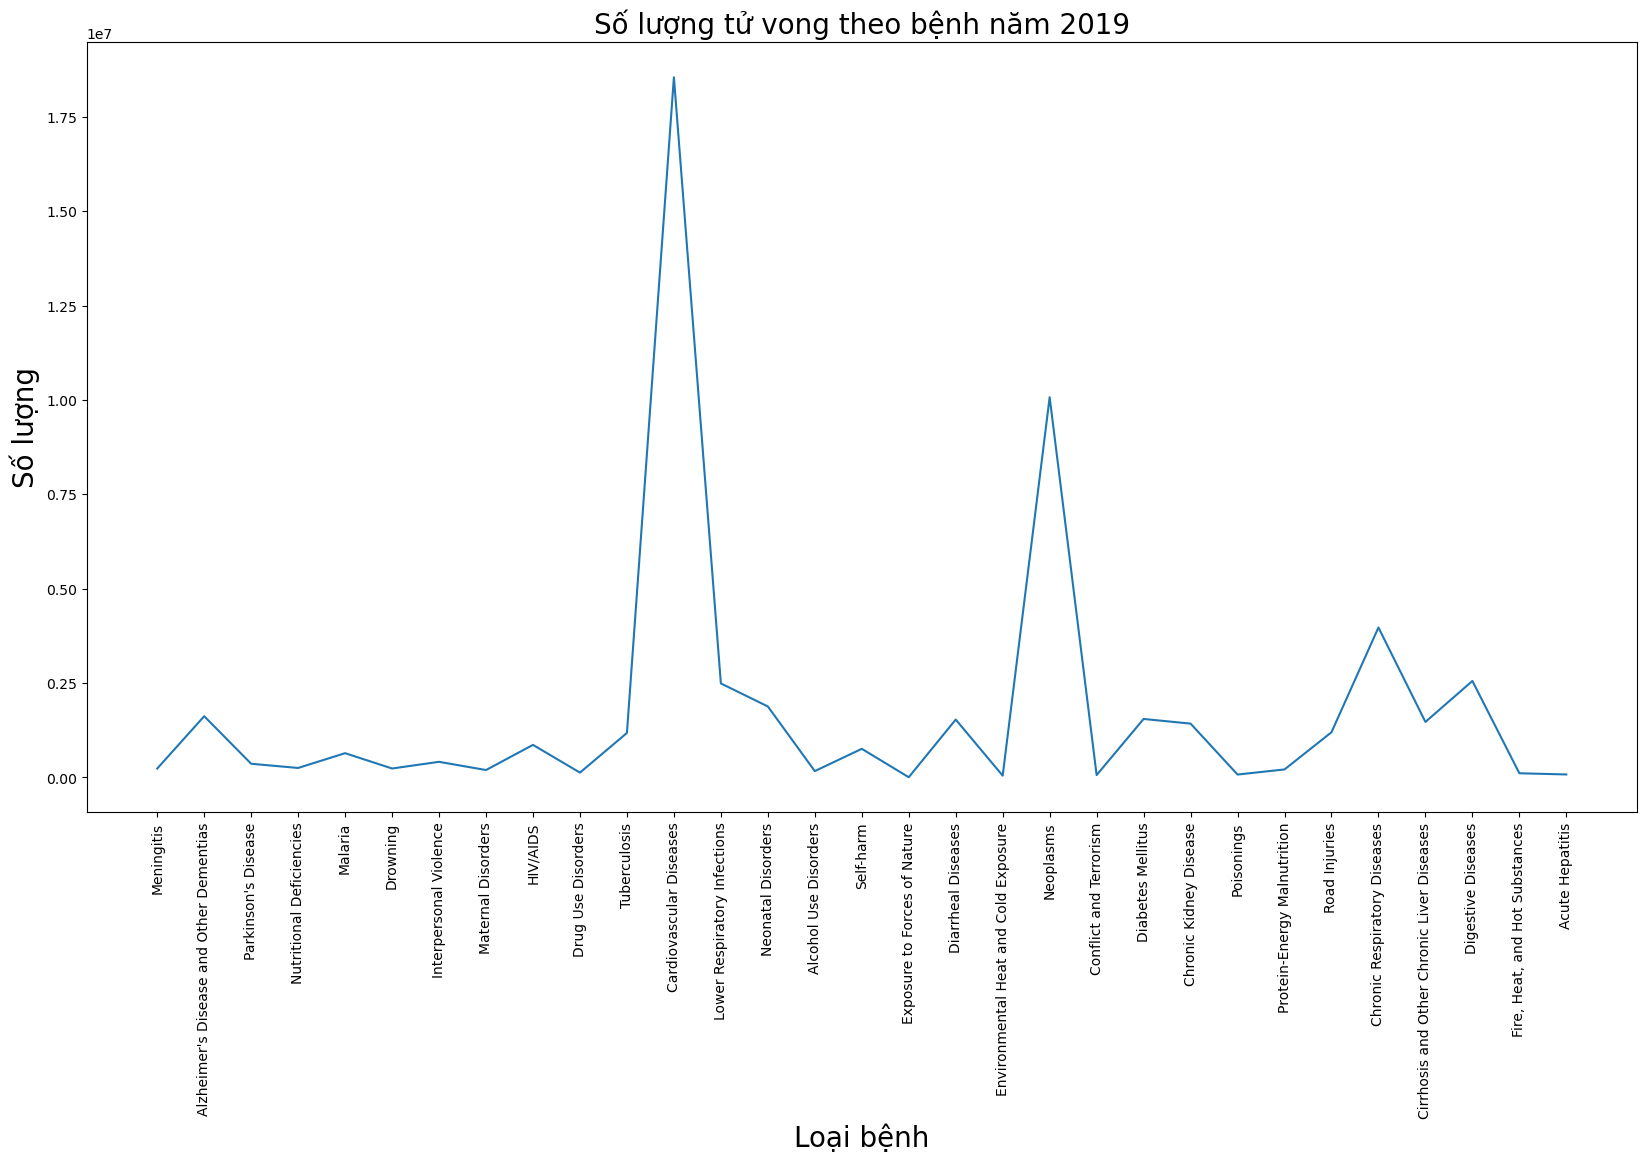

In [50]:
plt.figure(figsize = (20,10))

plt.plot(label, cause_of_deaths_total)

#customize chart
plt.title('Số lượng tử vong theo bệnh năm 2019', fontsize = 20)
plt.xlabel('Loại bệnh', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

Có thể thấy bệnh tim mạch (Cardiovascular Diseases) chiếm số lượng tử vong cao nhất, chính vì hãy cùng khảo sát xem xu hướng tử vong do bệnh tim mạch biến đổi như thế nào trong 30 năm qua